In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import networkx as nx

from sklearn.neighbors import NearestNeighbors

In [48]:
def threshold(A, eps=0.3):
    B = A.copy()
    B = (B < eps).astype(int)
    np.fill_diagonal(B, 0)
    return B

def knn(A, k=5):
    nbrs = NearestNeighbors(n_neighbors=k+1, metric="precomputed").fit(A)
    K = nbrs.kneighbors_graph(A).toarray().astype(int)
    np.fill_diagonal(K, 0)
    return K + K.T

In [33]:
def _knn(A, k=3):
    B = A.copy()

    for i, _ in enumerate(B):
        knn_dist_i = np.sort(B[i])[k-1]
        B[i] = (B[i] <= knn_dist_i).astype(int)

    np.fill_diagonal(B, 0)
    return B + B.T

In [3]:
df = pd.read_csv("../data/CardioGraph.txt", header=None)

In [4]:
%%time
d = np.zeros((876, 876))

for index, row in df.iterrows():
    i, j, value = int(row[0]), int(row[1]), row[2]
    
    d[i,j] = value

CPU times: user 1min 4s, sys: 304 ms, total: 1min 4s
Wall time: 1min 5s


In [6]:
d /= d.max()
D /= D.max()
D.max()

1.0

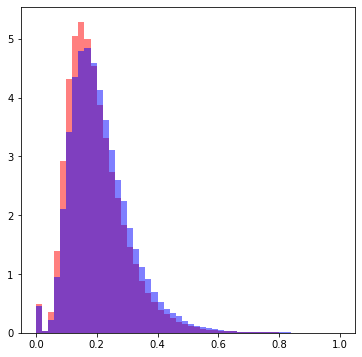

In [7]:
plt.figure(figsize=(6,6))
n, bins, patches = plt.hist(d.flatten(), 50, density=True, facecolor='r', alpha=0.5)
n, bins, patches = plt.hist(D.flatten(), 50, density=True, facecolor='b', alpha=0.5)

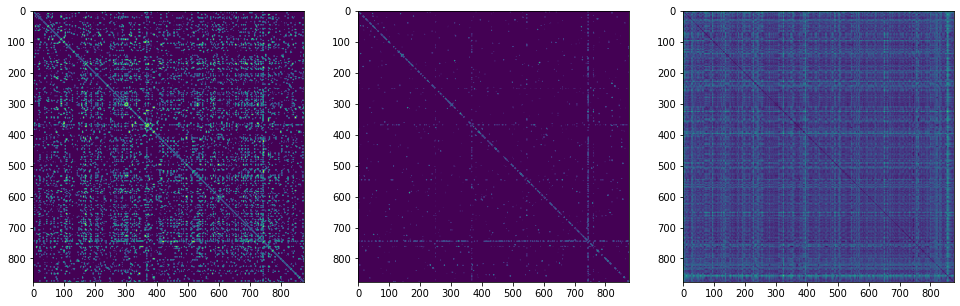

In [50]:
A = threshold(D, 0.1)
K = knn(D, 5)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16.5,5.5))
ax[0].imshow(A)
ax[1].imshow(K)
ax[2].imshow(D)
plt.show()

In [54]:
G = nx.from_numpy_array(K)

In [55]:
simplices = []

min_clique, max_clique = 2, 20

cliques = nx.find_cliques(G)
max_clique_size = 0

for clique in cliques:
    if (len(clique) >= min_clique) & (len(clique) <= max_clique):
        simplices.append(clique)
        
        if len(clique) > max_clique_size:
            max_clique_size = len(clique)
        
len(simplices), max_clique_size

(2014, 6)

In [56]:
simplices

[[4, 224, 223],
 [4, 532],
 [4, 5, 6],
 [5, 6, 819],
 [5, 6, 820],
 [5, 6, 821],
 [5, 6, 822],
 [7, 8, 9, 137, 138],
 [7, 8, 46, 47],
 [9, 136, 137, 138],
 [9, 48],
 [9, 431],
 [15, 17, 16],
 [15, 17, 49],
 [15, 17, 178, 179],
 [16, 180],
 [16, 46, 48, 47],
 [17, 50, 49],
 [18, 19, 372],
 [18, 19, 61],
 [18, 19, 532, 20],
 [18, 19, 837, 603, 605],
 [18, 19, 837, 20],
 [20, 721, 722],
 [20, 722, 723],
 [20, 533, 534, 532],
 [20, 533, 534, 604],
 [20, 91, 93],
 [24, 772, 25, 774, 776],
 [24, 772, 25, 774, 26],
 [25, 772, 774, 777, 776],
 [26, 772, 773, 774],
 [27, 29, 396, 394, 395],
 [27, 29, 28, 506, 507, 508],
 [27, 29, 28, 394, 395],
 [30, 477, 478],
 [30, 31, 53],
 [30, 31, 661],
 [31, 368],
 [31, 367],
 [34, 545],
 [34, 546],
 [34, 742],
 [34, 760],
 [34, 761],
 [34, 251],
 [34, 252],
 [37, 161, 39, 862, 863],
 [37, 161, 39, 38],
 [37, 161, 39, 311, 312],
 [37, 861],
 [38, 161, 76, 78],
 [38, 646],
 [38, 622, 623],
 [38, 313, 160, 159],
 [38, 313, 76, 78],
 [40, 64, 65, 41, 42],
 [